# _Desafío 5_ **Sebastián Acevedo Espinoza**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,r2_score

# _Pregunta 1_

In [2]:
df=pd.read_excel('house_data.xlsx')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Paso 1: Verificar valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Paso 2: Verificar duplicados
duplicate_rows = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicate_rows}")

# Paso 3: Análisis de Outliers usando el método IQR para columnas numéricas
numerical_cols = df.select_dtypes(include=np.number).columns

print("\nAnálisis de Outliers (método IQR):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"  Número de outliers en '{col}': {len(outliers)}")

Valores faltantes por columna:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Número de filas duplicadas: 0

Análisis de Outliers (método IQR):
  Número de outliers en 'id': 0
  Número de outliers en 'price': 1146
  Número de outliers en 'bedrooms': 546
  Número de outliers en 'bathrooms': 571
  Número de outliers en 'sqft_living': 572
  Número de outliers en 'sqft_lot': 2425
  Número de outliers en 'floors': 0
  Número de outliers en 'waterfront': 163
  Número de outliers en 'view': 2124
  Número de outliers en 'condition': 30
  Número de outliers en 'grade': 1911
  Número de outliers en 'sqft_above': 611
  Número de outliers

In [6]:
# Paso 4: Mostrar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(df.head())


Primeras filas del DataFrame:
           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900         3       1.00         1180   
1  6414100192  20141209T000000  538000         3       2.25         2570   
2  5631500400  20150225T000000  180000         2       1.00          770   
3  2487200875  20141209T000000  604000         4       3.00         1960   
4  1954400510  20150218T000000  510000         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipc

### No existen falores faltantes y no exiten filas duplicadas

# _Pregunta 2_

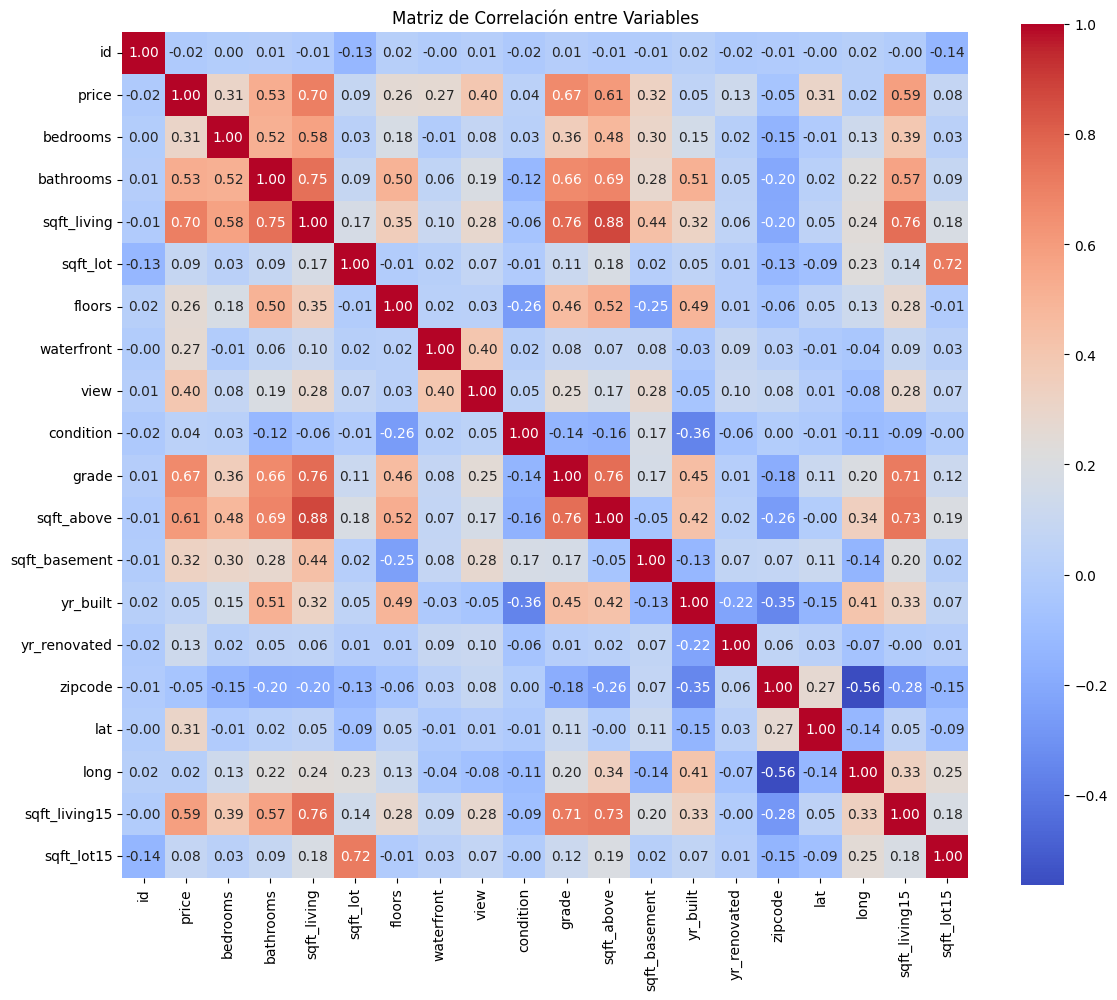

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
Name: price, dtype: float64

In [7]:
# Calcular matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Seleccionar correlaciones con respecto a 'price' y ordenarlas
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Crear un heatmap con todas las correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación entre Variables")
plt.tight_layout()
plt.show()

# Mostrar las 10 variables más correlacionadas con el precio
correlation_with_price.head(10)


### haciendo la correlación con _price_, la mayor correlación es con la variable **sqft_living** lo que nos indica que a mayor superficie de la casa a vender, tiene mayor precio.

### En resumen, las características con la correlación positiva más fuerte con el precio son sqft_living, grade y sqft_above. Esto indica que estas características son los predictores lineales más fuertes del precio en este conjunto de datos.

# _Pregunta 3_

In [8]:
# Seleccionamos las variables predictoras (features) y la variable objetivo (target)
# Excluimos columnas no numéricas o identificadores que no usaremos directamente en el modelo
features = df.drop(columns=['id', 'date', 'price', 'zipcode', 'lat', 'long'])
target = df['price'] # La variable que queremos predecir

# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
# test_size=0.33 significa que el 33% de los datos se usarán para prueba
# random_state=42 asegura que la división sea la misma cada vez que se ejecuta el código
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

# Inicializamos el escalador estándar (StandardScaler)
# Este escalador transforma los datos para que tengan una media de 0 y una desviación estándar de 1
scaler = StandardScaler()

# Ajustamos el escalador solo con los datos de entrenamiento y luego transformamos los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformamos los datos de prueba usando el escalador que ya fue ajustado con los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Mostramos la forma (número de filas y columnas) de los conjuntos escalados
print("Forma del conjunto de entrenamiento escalado:", X_train_scaled.shape)
print("Forma del conjunto de prueba escalado:", X_test_scaled.shape)

# Mostramos la lista de nombres de las columnas que se usaron como features
print("Columnas usadas como features:", X_train.columns.tolist())

# Opcional: Mostrar un ejemplo de los datos escalados (las primeras filas)
print("\nPrimeras filas del conjunto de entrenamiento escalado:")
print(X_train_scaled[:5])



Forma del conjunto de entrenamiento escalado: (14480, 15)
Forma del conjunto de prueba escalado: (7133, 15)
Columnas usadas como features: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

Primeras filas del conjunto de entrenamiento escalado:
[[ 6.75912998e-01  8.31181852e-01  5.76674482e-01 -3.09076921e-01
   1.78296007e-03 -8.33912641e-02 -3.05310305e-01 -6.29701867e-01
  -5.57195429e-01 -2.01915962e-01  1.57354199e+00 -1.19388088e+00
  -2.07544181e-01 -3.44323504e-02 -3.33824349e-01]
 [-3.93027610e-01  5.04857000e-01  7.06571386e-02 -1.39676342e-01
   9.23828024e-01 -8.33912641e-02 -3.05310305e-01 -6.29701867e-01
   2.95859108e-01  4.27334985e-01 -6.57816422e-01  7.79830207e-01
  -2.07544181e-01  2.87880853e-01 -1.32924880e-01]
 [ 6.75912998e-01 -4.74117559e-01 -3.80358320e-01 -7.94238078e-02
  -9.20262103e-01 -8.33912641e-02 -3.0531030

# _Pregunta 4_

In [9]:
# Definir los modelos y sus parámetros
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
elastic_params = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Inicializar modelos
models = {
    'Ridge': GridSearchCV(Ridge(), ridge_params, cv=5,verbose=1, n_jobs=-1),
    'Lasso': GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5,verbose=1, n_jobs=-1),
    'ElasticNet': GridSearchCV(ElasticNet(max_iter=10000), elastic_params, cv=5,verbose=1, n_jobs=-1),
    'DecisionTree': GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params, cv=5,verbose=1, n_jobs=-1)
}

# Entrenar y evaluar modelos
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Modelo': name,
        'Mejor Parámetro': model.best_params_,
        'RMSE': rmse,
        'R^2 Score': r2
    })

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)
results_df.sort_values(by='RMSE')


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


,Modelo,Mejor Parámetro,RMSE,R^2 Score
3,DecisionTree,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",221995.133168,0.670865
1,Lasso,{'alpha': 10},228439.391944,0.651479
0,Ridge,{'alpha': 10},228446.598427,0.651457
2,ElasticNet,"{'alpha': 0.01, 'l1_ratio': 0.5}",228505.656075,0.651277


Mejor Parámetro

Resultado del proceso de ajuste de hiperparámetros (Grid Search). Por ejemplo:

    En Lasso y Ridge, el parámetro alpha controla la fuerza de la regularización (penalización).

    En ElasticNet, además de alpha, también se ajusta l1_ratio, que mezcla Lasso y Ridge.

    En DecisionTree, los parámetros como max_depth, min_samples_leaf, y min_samples_split controlan la complejidad del árbol.

 RMSE (Root Mean Squared Error)

    Es la raíz cuadrada del MSE, y mide cuánto se desvía en promedio la predicción del valor real (en las mismas unidades que el precio).

    Mientras menor el RMSE, mejor el rendimiento del modelo.

 R² Score (Coeficiente de Determinación)

    Mide qué proporción de la varianza del precio de las casas está explicada por el modelo.

    El valor ideal es 1.0. Un valor cercano a 0.67 indica que el modelo explica aproximadamente el 67% de la variabilidad en los precios.

Mejor modelo: Árbol de Decisión (DecisionTree)

    Tiene el menor RMSE y el mayor R² (0.6709).

    Esto sugiere que está capturando relaciones no lineales y complejas entre las variables predictoras y el precio de la casa, lo que lo hace ligeramente mejor que los modelos lineales.

Modelos Lineales con Regularización (Lasso, Ridge, ElasticNet)

    Tienen un desempeño bastante similar entre sí, con un R² alrededor de 0.651, lo que significa que explican ~65% de la varianza.

    Ligeramente peor que el árbol, pero más simples e interpretables.

Los hiperparámetros elegidos (alpha y l1_ratio)

    El hecho de que alpha=10 funcionó bien para Lasso y Ridge sugiere que una penalización más fuerte mejoró el modelo evitando sobreajuste.

    En ElasticNet, la mejor combinación fue alpha=0.01 y l1_ratio=0.5, que indica un balance entre Lasso y Ridge.

El modelo de árbol de regresión logró el mejor desempeño, probablemente porque las relaciones entre las variables y el precio de la casa no son completamente lineales.

Los modelos lineales regularizados ofrecen resultados estables y explicables, aunque ligeramente inferiores en precisión.

Es recomendable usar árboles o incluso modelos más avanzados (como Random Forest o Gradient Boosting) si lo que más importa es la precisión.

# _Pregunta 5_

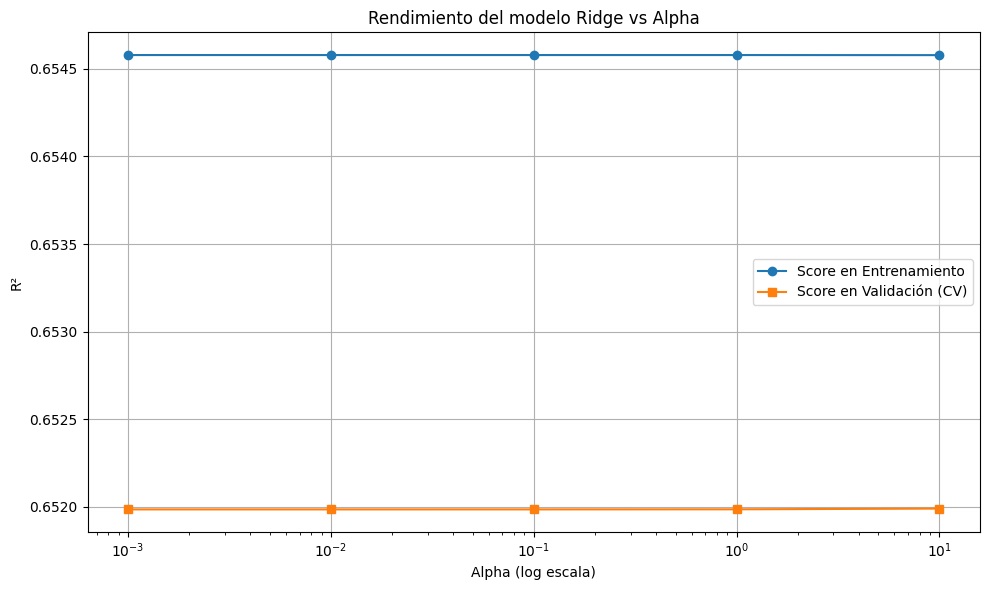

In [10]:
# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reentrenar modelo Ridge con validación cruzada
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge = GridSearchCV(Ridge(), ridge_params, cv=5, return_train_score=True)
ridge.fit(X_train_scaled, y_train)

# Extraer resultados para graficar
alphas = ridge.cv_results_['param_alpha'].data
mean_test_scores = ridge.cv_results_['mean_test_score']
mean_train_scores = ridge.cv_results_['mean_train_score']

# Graficamos el rendimiento en función de alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_train_scores, label='Score en Entrenamiento', marker='o')
plt.plot(alphas, mean_test_scores, label='Score en Validación (CV)', marker='s')
plt.xscale('log')
plt.xlabel('Alpha (log escala)')
plt.ylabel('R²')
plt.title('Rendimiento del modelo Ridge vs Alpha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 **El gráfico muestra**

_Eje X_: valores de alpha en escala logarítmica(usamos esta escala porque alpha tiene valores muy pequeños y podemos visuzalizarlo mejor con escala logaritmica). Este hiperparámetro penaliza la magnitud de los coeficientes:

        Valores pequeños de alpha → menor regularización (modelo más flexible).

        Valores grandes de alpha → mayor regularización (modelo más simple).

_Eje Y_: el valor del R², que mide el rendimiento del modelo:

        Un valor más alto de R² indica mejor ajuste.

_Líneas en la gráfica_:

        Azul (círculos): Score en entrenamiento.

        Naranja (cuadrados): Score en validación cruzada (CV).

**Interpretación de los resultados**

_Estabilidad del rendimiento_:

        El valor de R² se mantiene muy estable tanto en entrenamiento como en validación, a lo largo de los valores de alpha probados.

        Esto sugiere que el modelo no es muy sensible al valor de alpha dentro del rango evaluado.

_Score de entrenamiento vs. validación_:

        El score de entrenamiento (línea azul) es ligeramente mayor que el de validación, como es esperable (el modelo ve los datos de entrenamiento).

        La diferencia es pequeña, lo que sugiere que no hay sobreajuste significativo.

_Tendencia leve al aumentar alpha_:

        Hay una ligera baja en el score de entrenamiento cuando alpha crece mucho (de 1 a 10), lo que indica que el modelo se está volviendo un poco más rígido.

        Sin embargo, el score de validación apenas varía, lo que sugiere que la regularización no mejora ni empeora el rendimiento general.

# _Pregunta 6_

In [11]:
# Reentrenar modelos con mejores hiperparámetros
best_ridge = ridge.best_estimator_

lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5,verbose=1, n_jobs=-1)
lasso.fit(X_train_scaled, y_train)
best_lasso = lasso.best_estimator_

elastic_params = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elastic = GridSearchCV(ElasticNet(max_iter=10000), elastic_params, cv=5,verbose=1, n_jobs=-1)
elastic.fit(X_train_scaled, y_train)
best_elastic = elastic.best_estimator_

tree_params = {'max_depth': [None, 10, 20, 30],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}
tree = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params, cv=5,verbose=1, n_jobs=-1)
tree.fit(X_train, y_train)
best_tree = tree.best_estimator_

# Evaluar modelos en test
models = {
    "Ridge": best_ridge,
    "Lasso": best_lasso,
    "ElasticNet": best_elastic,
    "Árbol de Regresión": best_tree
}

results = []

for name, model in models.items():
    if name == "Árbol de Regresión":
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Modelo": name,
        "MSE": round(mse, 2),
        "MAE": round(mae, 2),
        "R²": round(r2, 4)
    })

# Convertir a DataFrame para mostrar
results_df = pd.DataFrame(results)
results_df.sort_values(by="R²", ascending=False)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


,Modelo,MSE,MAE,R²
3,Árbol de Regresión,4.928100e+10,135025.31,0.6709
0,Ridge,5.218785e+10,142478.57,0.6515
1,Lasso,5.218456e+10,142491.33,0.6515
2,ElasticNet,5.221483e+10,142391.76,0.6513


**el mejor modelo es el que tiene mayor R^{2}, con menores MAE y MSE es más eficaz, por lo tanto, el mejor modelo es el _Árbol de Regresión_, lo cual indica que capta mejor las relaciones no lineales y complejas entre las variables y el precio de las casas.**

_Los modelos Ridge, Lasso y ElasticNet presentan rendimientos prácticamente idénticos entre sí, lo que indica que la regularización (L1, L2 o combinación) no varía mucho en impacto, posiblemente por la estructura lineal de los datos y la escasa presencia de colinealidades extremas_.

_El MSE sigue la misma tendencia, reforzando la superioridad relativa del modelo de árbol_.

## **Conclusión Final**

El modelo **Árbol de Regresión** es el más adecuado para este caso, ya que logra capturar relaciones no lineales que los modelos lineales con regularización no pueden.

Sin embargo, es importante verificar el sobreajuste, ya que los árboles muy profundos pueden ajustarse excesivamente al conjunto de entrenamiento.

Para mayor robustez, podrías explorar modelos ensamble, como Random Forest o Gradient Boosting, que suelen mejorar el rendimiento de los árboles individuales.